Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [28]:
import pandas as pd

In [29]:
# Set variables for CSV files
yelp_file = "yelp_results_final.csv"
foursquare_file = "foursquare_results_final.csv"
bike_stations_file = "tokyo_bike_stations.csv"

In [30]:
# Load data into dataframe
df_yelp = pd.read_csv(yelp_file)
df_foursquare = pd.read_csv(foursquare_file)
df_bike_stations = pd.read_csv(bike_stations_file)

In [31]:
# Standardize column names for merging
df_yelp = df_yelp.rename(columns={"Review Count": "Reviews", "Rating": "Yelp Rating"})
df_foursquare = df_foursquare.rename(columns={"Category": "Foursquare Category"})

# Add a source column to differentiate data
df_yelp["Source"] = "Yelp"
df_foursquare["Source"] = "Foursquare"

# Combine the two DataFrames
df_combined = pd.concat([df_yelp, df_foursquare], ignore_index=True)

# Remove duplicates
df_combined = df_combined.drop_duplicates(subset=["Name", "Latitude", "Longitude"])

In [32]:
# Merge with Bike Station Data
df_final_combined = df_combined.merge(
    df_bike_stations, how="left", left_on="Bike Station", right_on="Name", suffixes=("_Bar", "_Bike_Station")
)

# Save the merged DataFrame
final_combined_file = "final_combined_data.csv"
df_final_combined.to_csv(final_combined_file, index=False)

In [33]:
df_final_combined.head()

,Bike Station,Name_Bar,Latitude_Bar,Longitude_Bar,Yelp Rating,Reviews,Address,Source,Foursquare Category,Name_Bike_Station,Latitude_Bike_Station,Longitude_Bike_Station,Available Bikes,Total Slots
0,北八王子駅,旅路,35.669712,139.362544,0.0,0.0,"石川町2958, Hachioji, 東京都 〒192-0032, Japan",Yelp,NaN,北八王子駅,35.669747,139.363454,10.0,10.0
1,北八王子駅,スナック永梨奈,35.661953,139.379163,0.0,0.0,"多摩平1丁目4-8, Hino, 東京都 〒191-0062, Japan",Yelp,NaN,北八王子駅,35.669747,139.363454,10.0,10.0
2,北八王子駅,オーチャードグリーン・テニス・フットサルクラブ,35.677468,139.366144,0.0,0.0,"石川町1401-1, Hachioji, 東京都 〒192-0032, Japan",Yelp,NaN,北八王子駅,35.669747,139.363454,10.0,10.0
3,北八王子駅,ティファニー,35.669202,139.376021,0.0,0.0,"多摩平5丁目5-1, Hino, 東京都 〒191-0062, Japan",Yelp,NaN,北八王子駅,35.669747,139.363454,10.0,10.0
4,北八王子駅,いと,35.660499,139.359241,0.0,0.0,"大和田町1丁目19-28, 溝口ビル-1Ｆ-1, Hachioji, 東京都 〒192-00...",Yelp,NaN,北八王子駅,35.669747,139.363454,10.0,10.0


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Convert necessary columns to numeric values
df_final_combined["Yelp Rating"] = pd.to_numeric(df_final_combined["Yelp Rating"], errors="coerce")
df_final_combined["Reviews"] = pd.to_numeric(df_final_combined["Reviews"], errors="coerce")
df_final_combined["Total Slots"] = pd.to_numeric(df_final_combined["Total Slots"], errors="coerce")

In [35]:
# Filter out rows with missing values and review count less than 5
df_filtered = df_final_combined.dropna(subset=["Yelp Rating", "Reviews", "Total Slots"])
df_filtered = df_filtered[df_filtered["Reviews"] >= 5]

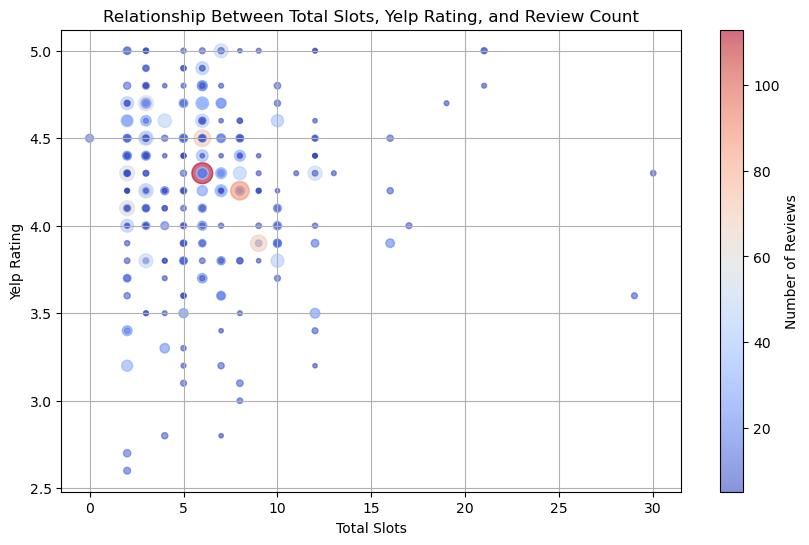

In [37]:
# scatter plot: Total Slots vs. Yelp Rating (size = Review Count)
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered["Total Slots"], df_filtered["Yelp Rating"], 
            s=df_filtered["Reviews"] * 2, alpha=0.6, c=df_filtered["Reviews"], cmap="coolwarm")
plt.colorbar(label="Number of Reviews")
plt.xlabel("Total Slots")
plt.ylabel("Yelp Rating")
plt.title("Relationship Between Total Slots, Yelp Rating, and Review Count")
plt.grid(True)

plt.show()

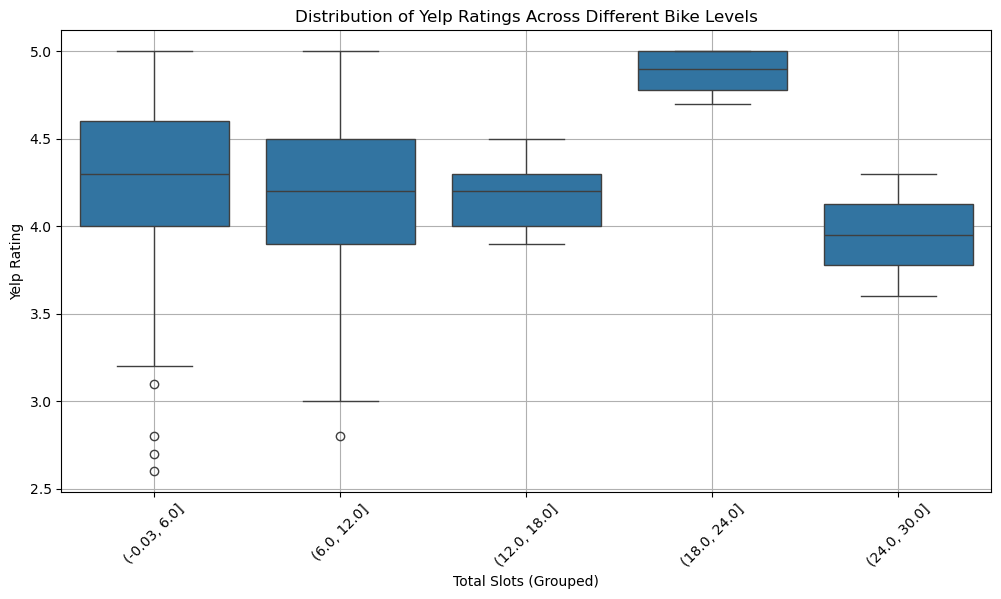

In [39]:
# boxplot to visualize Yelp Rating vs. Total Slots
plt.figure(figsize=(12, 6))
sns.boxplot(x=pd.cut(df_filtered["Total Slots"], bins=5), y=df_filtered["Yelp Rating"])
plt.xlabel("Total Slots (Grouped)")
plt.ylabel("Yelp Rating")
plt.title("Distribution of Yelp Ratings Across Different Bike Levels")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

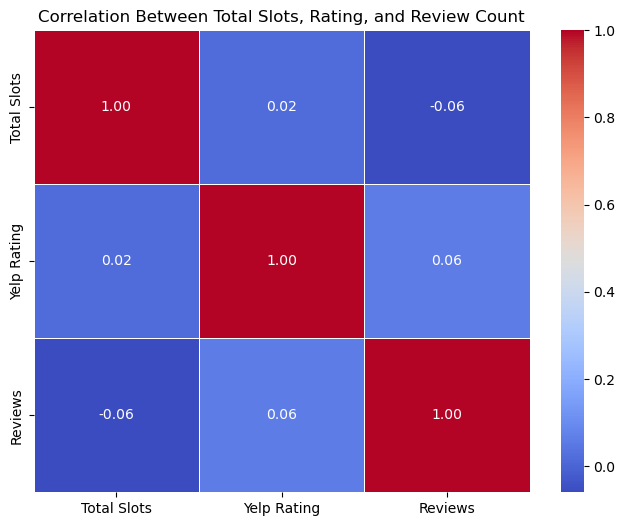

In [40]:
# Compute correlation matrix
correlation_matrix = df_filtered[["Total Slots", "Yelp Rating", "Reviews"]].corr()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Total Slots, Rating, and Review Count")

plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [48]:
import sqlite3
import os

In [51]:
# Define file paths
csv_files = {
    "bike_stations": r"C:\LHL\LHL-Statistical-Modelling\LHL-Statistical-Modelling\notebooks\tokyo_bike_stations.csv",
    "final_combined_data": r"C:\LHL\LHL-Statistical-Modelling\LHL-Statistical-Modelling\notebooks\final_combined_data.csv"
}

db_dir = r"C:\LHL\LHL-Statistical-Modelling\LHL-Statistical-Modelling\Database"
db_path = os.path.join(db_dir, "data.db")

In [52]:
# Connect to SQLite database (or create if it doesn't exist)
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Create bike_stations table from tokyo_bike_stations.csv
try:
    df_bike_stations = pd.read_csv(csv_files["bike_stations"])
    
    # Store as a table in SQLite
    df_bike_stations.to_sql("bike_stations", conn, if_exists="replace", index=False)
    
    cursor.execute("SELECT COUNT(*) FROM bike_stations")
    print(f"✅ bike_stations table created with {cursor.fetchone()[0]} rows.")

except Exception as e:
    print(f"❌ Error processing bike_stations: {e}")

# Process final_combined_data.csv and create bars table
try:
    df_bars = pd.read_csv(csv_files["final_combined_data"])

    # Drop redundant bike station columns (since bike_stations table already has them)
    df_bars = df_bars.drop(columns=["Name_Bike_Station", "Latitude_Bike_Station", "Longitude_Bike_Station", "Available Bikes", "Total Slots"])

    # Save cleaned data as the "bars" table
    df_bars.to_sql("bars", conn, if_exists="replace", index=False)

    cursor.execute("SELECT COUNT(*) FROM bars")
    print(f"✅ bars table created with {cursor.fetchone()[0]} rows.")

except Exception as e:
    print(f"❌ Error processing bars: {e}")

# Close connection
conn.close()
print("✅ Database update complete.")

✅ bike_stations table created with 2961 rows.
✅ bars table created with 30209 rows.
✅ Database update complete.


Look at the data before and after the join to validate your data.

In [53]:
# Check the first few rows of each table
df_bike_stations_preview = df_bike_stations.head()
df_bars_preview = df_bars.head()

In [55]:
df_bars.head()

,Bike Station,Name_Bar,Latitude_Bar,Longitude_Bar,Yelp Rating,Reviews,Address,Source,Foursquare or Yelp
0,北八王子駅,旅路,35.669712,139.362544,0.0,0.0,"石川町2958, Hachioji, 東京都 〒192-0032, Japan",Yelp,NaN
1,北八王子駅,スナック永梨奈,35.661953,139.379163,0.0,0.0,"多摩平1丁目4-8, Hino, 東京都 〒191-0062, Japan",Yelp,NaN
2,北八王子駅,オーチャードグリーン・テニス・フットサルクラブ,35.677468,139.366144,0.0,0.0,"石川町1401-1, Hachioji, 東京都 〒192-0032, Japan",Yelp,NaN
3,北八王子駅,ティファニー,35.669202,139.376021,0.0,0.0,"多摩平5丁目5-1, Hino, 東京都 〒191-0062, Japan",Yelp,NaN
4,北八王子駅,いと,35.660499,139.359241,0.0,0.0,"大和田町1丁目19-28, 溝口ビル-1Ｆ-1, Hachioji, 東京都 〒192-00...",Yelp,NaN


In [56]:
df_bike_stations.head()

,Name,Latitude,Longitude,Available Bikes,Total Slots
0,北八王子駅,35.669747,139.363454,10,10
1,湯の森 深大湯,35.677585,139.546591,7,7
2,池之端2丁目 上野動物公園西​,35.714957,139.767394,3,6
3,ビイルーム自由が丘,35.600717,139.665204,3,4
4,ローソン 板橋東坂下一丁目店,35.782192,139.690197,4,5


✅ Successfully filtered Foursquare categories while keeping Yelp results.
